In [145]:

from src.visualization import plot_cum_trade_log_returns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
from importlib import reload
import src.features as features
import src.visualization as visualization
import src.model as model
from src.model import set_seeds, time_split, train_test_split, train_model, evaluate_model, get_trade_results, get_strategy_metrics

In [147]:
df = features.get_digital_data("BTCUSDT","4h","2020-11-11")
df.head()


C:\Users\Amin\PycharmProjects\PythonProject\src\features.py:34: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  df = pl.DataFrame(klines, schema=cols)


date,open,high,low,close,volume
datetime[ms],f64,f64,f64,f64,f64
2020-11-11 00:00:00,15297.21,15499.58,15272.68,15401.9,11252.097142
2020-11-11 04:00:00,15401.9,15441.37,15322.02,15400.51,5830.865996
2020-11-11 08:00:00,15400.5,15680.0,15363.37,15574.48,13706.745887
2020-11-11 12:00:00,15574.48,15718.91,15477.0,15667.27,13545.826971
2020-11-11 16:00:00,15667.5,15965.0,15639.21,15807.58,22805.0493


In [148]:
df = features.create_time_series_transform(df,"close","volume",1)
df.head()

date,open,high,low,close,volume,close_log_return,log_volume
datetime[ms],f64,f64,f64,f64,f64,f64,f64
2020-11-11 00:00:00,15297.21,15499.58,15272.68,15401.9,11252.097142,null,null
2020-11-11 04:00:00,15401.9,15441.37,15322.02,15400.51,5830.865996,-0.00009,-0.657389
2020-11-11 08:00:00,15400.5,15680.0,15363.37,15574.48,13706.745887,0.011233,0.854723
2020-11-11 12:00:00,15574.48,15718.91,15477.0,15667.27,13545.826971,0.00594,-0.01181
2020-11-11 16:00:00,15667.5,15965.0,15639.21,15807.58,22805.0493,0.008916,0.520903


In [149]:
# max_lags = 4
df = features.create_lag_feature(df,["close_log_return","log_volume"],4,1)
df.head()

date,open,high,low,close,volume,close_log_return,log_volume,close_log_return_lag1,close_log_return_lag2,close_log_return_lag3,close_log_return_lag4,log_volume_lag1,log_volume_lag2,log_volume_lag3,log_volume_lag4
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2020-11-11 20:00:00,15807.58,15886.0,15576.04,15684.24,11329.161162,-0.007833,-0.699602,0.008916,0.00594,0.011233,-0.00009,0.520903,-0.01181,0.854723,-0.657389
2020-11-12 00:00:00,15684.25,15711.77,15440.64,15628.14,11628.021693,-0.003583,0.026038,-0.007833,0.008916,0.00594,0.011233,-0.699602,0.520903,-0.01181,0.854723
2020-11-12 04:00:00,15628.14,15945.0,15591.54,15862.75,10308.733321,0.0149,-0.120426,-0.003583,-0.007833,0.008916,0.00594,0.026038,-0.699602,0.520903,-0.01181
2020-11-12 08:00:00,15862.75,16160.89,15600.0,15762.55,27118.660196,-0.006337,0.967231,0.0149,-0.003583,-0.007833,0.008916,-0.120426,0.026038,-0.699602,0.520903
2020-11-12 12:00:00,15762.55,16144.5,15747.14,16125.01,20899.418386,0.022735,-0.260501,-0.006337,0.0149,-0.003583,-0.007833,0.967231,-0.120426,0.026038,-0.699602


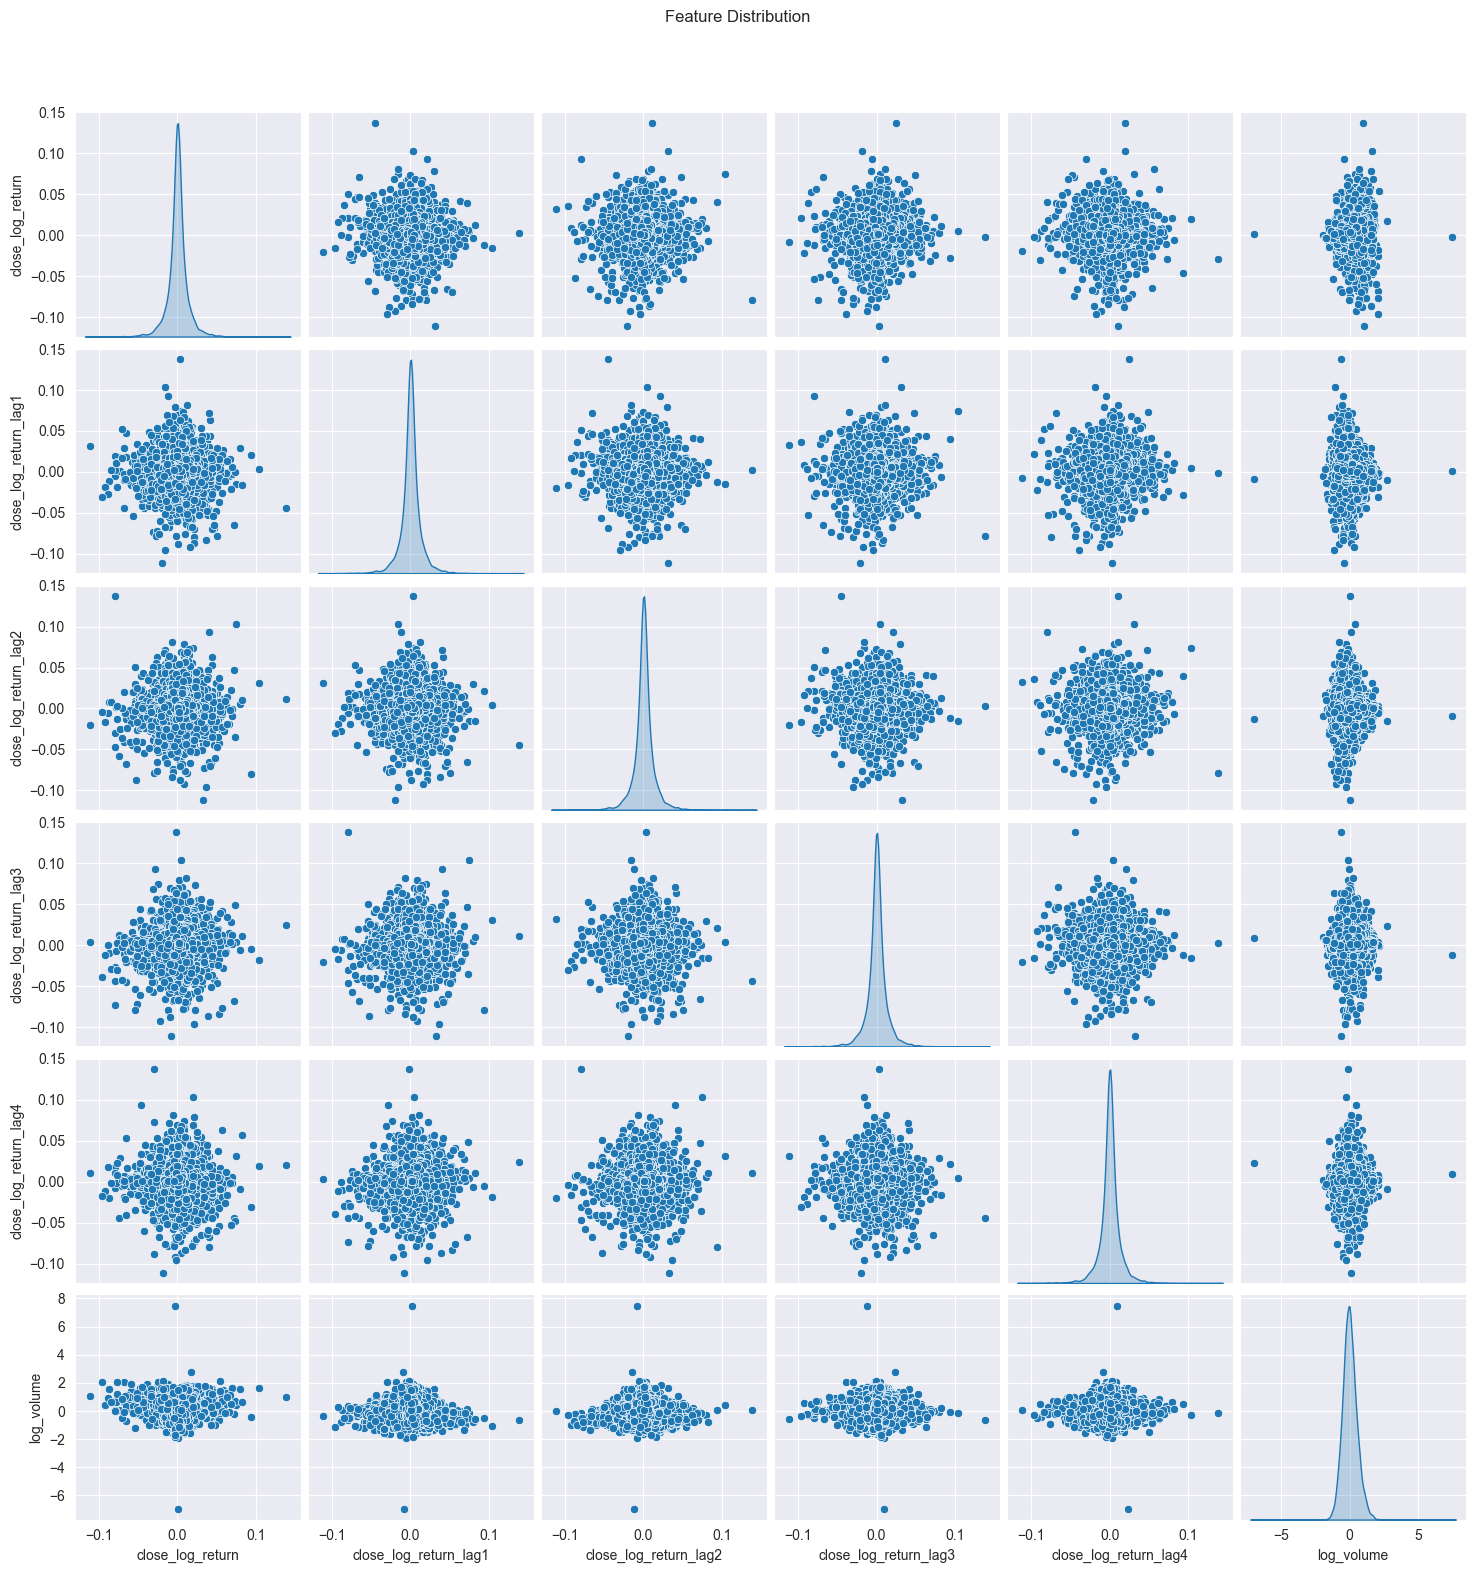

In [150]:
# plot feature distribution
visualization.plot_feature_distribution(df,["close_log_return","close_log_return_lag1","close_log_return_lag2","close_log_return_lag3","close_log_return_lag4","log_volume"])



In [151]:
# plot feature correlation
# Idea - Add PACF and ACF plots for added visualization
visualization.display_feature_corr(df,"close_log_return")

Feature,Abs_correlation
str,f64
"""close_log_return""",1.0
"""log_volume""",0.047456
"""close_log_return_lag3""",0.029782
"""close_log_return_lag1""",0.02893
"""close_log_return_lag2""",0.016685
…,…
"""log_volume_lag3""",0.006266
"""close""",0.005494
"""date""",0.005166


In [152]:
# Model Development
from src import model
# Set seed for reproducibility
set_seeds(seed=99)

# Features
from model import to_tensor
features = ["log_volume","close_log_return_lag1","close_log_return_lag2"]
target = "close_log_return"

# Create Tensors and split dataframe after setting seeds
X_train, X_test, y_train, y_test = train_test_split(df,features,target,train_size=0.75)

In [153]:
# Trained Model
input_size = X_train.shape[1]
lr = 0.0005

trained_model = train_model(X_train,y_train,input_size,"linear",lr=lr,epochs=5000,print_freq=500)


Model: Linear Regression
Starting training for 5000 epochs...
Epoch: 0000 | Loss: 0.179290
Epoch: 0500 | Loss: 0.116261
Epoch: 1000 | Loss: 0.077047
Epoch: 1500 | Loss: 0.052494
Epoch: 2000 | Loss: 0.036932
Epoch: 2500 | Loss: 0.026903
Epoch: 3000 | Loss: 0.020297
Epoch: 3500 | Loss: 0.015829
Epoch: 4000 | Loss: 0.012711
Epoch: 4500 | Loss: 0.010459

Training Complete.


In [154]:
# Evaluate model performance
from model import get_trade_results
y_hat = evaluate_model(trained_model, X_test)
results_df = get_trade_results(y_hat, y_test)
results_df

y_hat,y,is_won,signal,trade_log_return,equity_curve,drawdown_log
f32,f32,bool,f32,f32,f32,f32
-0.026752,-0.007745,true,-1.0,0.007745,0.007745,0.0
-0.125296,-0.011406,true,-1.0,0.011406,0.019151,0.0
0.279011,0.006346,true,1.0,0.006346,0.025497,0.0
-0.311253,-0.044232,true,-1.0,0.044232,0.069729,0.0
0.231793,0.003595,true,1.0,0.003595,0.073325,0.0
…,…,…,…,…,…,…
-0.382329,-0.045438,true,-1.0,0.045438,1.84955,-0.052862
0.192884,0.002362,true,1.0,0.002362,1.851912,-0.0505
0.144354,-0.004646,false,1.0,-0.004646,1.847266,-0.055146


In [155]:
import numpy as np

mean_ret = results_df["trade_log_return"].mean()
total_ret = results_df["trade_log_return"].sum()
std = results_df["trade_log_return"].std()
ann_fac = np.sqrt(365 * 6)

sharpe = (mean_ret / std) * ann_fac
total_ret

1.866581678390503

In [156]:
from src.model import get_strategy_metrics

In [157]:
trading_periods = 365 * 6
ann_fac_sqrt = np.sqrt(trading_periods)
strategy_metrics_df = get_strategy_metrics(
    trade_results_df=results_df,
    annual_factor_sqrt=ann_fac_sqrt
)

print("--- PERFORMANCE SUMMARY ---")
print(strategy_metrics_df)


--- PERFORMANCE SUMMARY ---
shape: (1, 8)
┌────────────┬────────────┬────────────┬────────────┬──────────┬───────────┬───────────┬───────────┐
│ Total_Retu ┆ Annualized ┆ Max_Drawdo ┆ Drawdown_P ┆ Win_Rate ┆ Total_Tra ┆ Compound  ┆ Calmar_Ra │
│ rn         ┆ _Sharpe    ┆ wn         ┆ ct         ┆ ---      ┆ des       ┆ Return    ┆ tio       │
│ ---        ┆ ---        ┆ ---        ┆ ---        ┆ f64      ┆ ---       ┆ ---       ┆ ---       │
│ f64        ┆ f64        ┆ f64        ┆ f64        ┆          ┆ i64       ┆ f64       ┆ f64       │
╞════════════╪════════════╪════════════╪════════════╪══════════╪═══════════╪═══════════╪═══════════╡
│ 1.866582   ┆ 3.240463   ┆ 0.219738   ┆ -0.197271  ┆ 0.524016 ┆ 2769      ┆ 6.466155  ┆ 8.494571  │
└────────────┴────────────┴────────────┴────────────┴──────────┴───────────┴───────────┴───────────┘


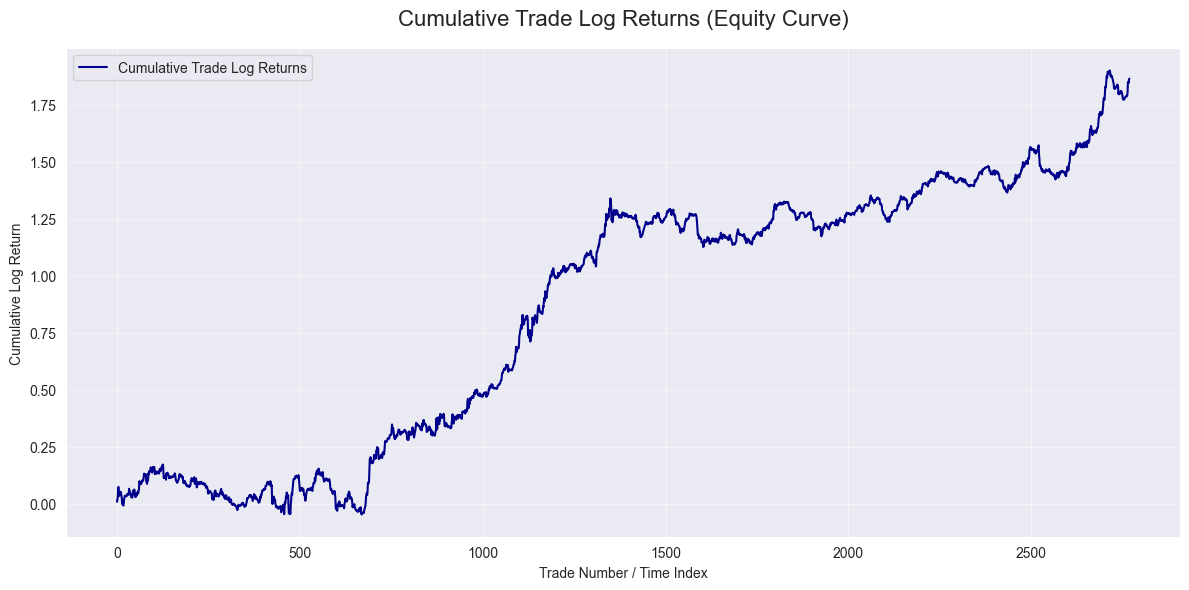

In [158]:

plot_cum_trade_log_returns(results_df,"equity_curve")